# Import data

In [208]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime
import datetime as dt
from sklearn import preprocessing
import statistics
import category_encoders as ce

In [209]:
#import data into python and check the dataset
df = pd.read_csv("C:\\Users\\88609\\OneDrive - Emory University\\Desktop\\Courses\\Fall Semester\\ISOM-671 Managing Big Data\\HW\\(1128)Final Project\\project_catgory_202211252313 (1).csv")
df.head(2)

C:\Users\88609\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24,25,27,28,40,41,50,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.00,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.00,31131.00,USD,$,31131.00,1.00,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.80,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.00,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.00,640.00,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.00,design/product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.00,48,1380594589,1383413613,1488327585,1383413613,1383413613.00,1380821613,15000.00,18167.88,USD,$,18167.88,1.00,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.80,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.00,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.00,640.00,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.00,publishing/nonfiction


In [210]:
#check the shape of the data
print('Row count is:', len(df.index))

Row count is: 408637


In [211]:
#check the shape of the data
print(len(df.columns))

58


In [212]:
#split parent_category column, rename parent category as p_category
df[['p_category', 'sub_category']] = df['parent_category'].str.split('/', expand=True)
df.head(2)

,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category,p_category,sub_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.00,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.00,31131.00,USD,$,31131.00,1.00,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.80,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.00,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.00,640.00,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.00,design/product design,design,product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.00,48,1380594589,1383413613,1488327585,1383413613,1383413613.00,1380821613,15000.00,18167.88,USD,$,18167.88,1.00,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.80,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.00,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.00,640.00,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.00,publishing/nonfiction,publishing,nonfiction


# Divde and Clean data

In [213]:
#show all the columns when using head function
pd.set_option('display.max_columns', None)

In [214]:
#check the null value of each column
df.isnull().sum()

id                                                0
state                                             0
url_project                                       0
url_project_short                                 0
name                                              3
country                                           0
creator_id                                        0
location_id                                    1759
category_id                                       0
created_at                                        0
deadline                                          0
updated_at                                        0
state_changed_at                                  0
successful_at                                253507
launched_at                                       0
goal                                              0
pledged                                           0
currency                                          0
currency_symbol                                   0
usd_pledged 

In [215]:
#drop duplicate row in dataset
df.drop_duplicates()

,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category,p_category,sub_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.00,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.00,31131.00,USD,$,31131.00,1.00,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.80,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.00,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.00,640.00,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.00,design/product design,design,product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.00,48,1380594589,1383413613,1488327585,1383413613,1383413613.00,1380821613,15000.00,18167.88,USD,$,18167.88,1.00,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.80,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.00,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.00,640.00,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.00,publishing/nonfiction,publishing,nonfiction
2,22821161,failed,https://www.kickstarter.com/projects/684178251...,https://www.kickstarter.com/projects/684178251...,Sentio Golf Putters: Feel IS the difference,US,684178251,2351810.00,28,1433725049,1446429290,1463739059,1446429290,NaN,1442537690,50000.00,9707.00,USD,$,9707.00,1.00,41,0,4,False,False,Choose the feel YOU want with our patented flo...,True,False,https://ksr-ugc.imgix.net/assets/012/161/151/b...,NaN,0.80,NaN,1945377,NaN,NaN,NaN,NaN,NaN,1945377,True,False,inactive,1433725049,NaN,sentio-golf-putters-feel-is-the-difference,https://www.kickstarter.com/projects/684178251...,https://www.kickstarter.com/projects/684178251...,579025.00,https://ksr-video.imgix.net/projects/1905803/v...,https://ksr-video.imgix.net/projects/1905803/v...,480.00,640.00,successful,www.kickstarter.com/projects/684178251/sentio-...,2017-03-11 01:20:37,NaN,design/product design,design,product design
3,22823613,failed,https://www.kickstarter.com/projects/123754320...,http://kck.st/2kL47iy,Brainade,US,1237543205,2497409.00,342,1486073091,1489778686,1489778687,1489778687,NaN,1487190286,750.00,1.00,USD,$,1.00,1.00,1,0,0,False,False,We intend to create an online platform for ind...,True,False,https://ksr-ugc.imgix.net/assets/015/387/055/f...,NaN,0.80,NaN,2862898,NaN,NaN,NaN,NaN,Na

In [216]:
df.head(2)

,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category,p_category,sub_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.00,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.00,31131.00,USD,$,31131.00,1.00,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.80,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.00,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.00,640.00,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.00,design/product design,design,product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.00,48,1380594589,1383413613,1488327585,1383413613,1383413613.00,1380821613,15000.00,18167.88,USD,$,18167.88,1.00,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.80,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.00,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.00,640.00,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.00,publishing/nonfiction,publishing,nonfiction


In [217]:
#drop useless columns and assign to new dataset
df_new = df.drop(['url_project','url_project_short','currency_symbol','name','blurb','photo_url','successful_at','profile_background_color','profile_blurb','profile_link_background_color','profile_link_text','profile_link_text_color',
            'profile_link_url','profile_name','profile_text_color','slug','url_rewards','url_updates','video_url_high','video_url_webm','file_name',
           'currency','static_usd_rate','pledged','profile_id','profile_project_id','profile_should_show_feature_image_section',
            'video_status','last_modification','video_id','creator_id','location_id','category_id','deleted_comments','video_height','video_width','sub_category','parent_category'], axis=1)

In [218]:
#recheck the null value of each column
df_new.isnull().sum()

id                                  0
state                               0
country                             0
created_at                          0
deadline                            0
updated_at                          0
state_changed_at                    0
launched_at                         0
goal                                0
usd_pledged                         0
backers_count                       0
comments_count                      0
updates_count                       0
spotlight                           0
staff_pick                          0
currency_trailing_code              0
disable_communication               0
profile_background_image_opacity    0
profile_show_feature_image          0
profile_state                       0
profile_state_changed_at            0
p_category                          0
dtype: int64

In [219]:
df_new.head(2)

,id,state,country,created_at,deadline,updated_at,state_changed_at,launched_at,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,currency_trailing_code,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,profile_state_changed_at,p_category
0,22807353,canceled,US,1453170931,1462402800,1472168774,1461010001,1458918033,10000.00,31131.00,255,53,22,False,False,True,False,0.80,False,inactive,1453170931,design
1,22810934,successful,US,1380594589,1383413613,1488327585,1383413613,1380821613,15000.00,18167.88,284,4,40,True,False,True,False,0.80,False,active,1432157366,publishing


###### deal timestamp ###########

In [221]:
#Original data store time as timestamp, tranfer time stamp into readable time
df_new['create_new'] = df_new['created_at'].apply(datetime.fromtimestamp)
df_new['deadline_new'] = df_new['deadline'].apply(datetime.fromtimestamp)
df_new['update_new'] = df_new['updated_at'].apply(datetime.fromtimestamp)
df_new['state_changed_new'] = df_new['state_changed_at'].apply(datetime.fromtimestamp)
df_new['launched_new'] = df_new['launched_at'].apply(datetime.fromtimestamp)
df_new['profile_state_changed_new'] = df_new['profile_state_changed_at'].apply(datetime.fromtimestamp)

df_new = df_new.drop(['created_at','deadline','updated_at','state_changed_at','launched_at','profile_state_changed_at'] , axis=1)

In [222]:
df_new.head(2)

,id,state,country,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,currency_trailing_code,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,p_category,create_new,deadline_new,update_new,state_changed_new,launched_new,profile_state_changed_new
0,22807353,canceled,US,10000.00,31131.00,255,53,22,False,False,True,False,0.80,False,inactive,design,2016-01-18 21:35:31,2016-05-04 19:00:00,2016-08-25 19:46:14,2016-04-18 16:06:41,2016-03-25 11:00:33,2016-01-18 21:35:31
1,22810934,successful,US,15000.00,18167.88,284,4,40,True,False,True,False,0.80,False,active,publishing,2013-09-30 22:29:49,2013-11-02 13:33:33,2017-02-28 19:19:45,2013-11-02 13:33:33,2013-10-03 13:33:33,2015-05-20 17:29:26


In [224]:
#Once we complete the readable time, calculate the difference of date
df_new['project_duration'] =  (df_new['deadline_new'].dt.date -df_new['create_new'].dt.date).dt.days

In [234]:
#drop useless date
df_new = df_new.drop(['create_new','deadline_new','update_new','state_changed_new','launched_new','profile_state_changed_new','currency_trailing_code','profile_background_image_opacity'], axis=1)

formating categorical variable

In [223]:
#change state value(target variable) into categorical
df_new['state'].unique()
df_new['state'] = df_new['state'].replace(['successful', 'canceled','failed','suspended','purged','live'], 
                                  [1, 0, 0, 0, 0, 0])

In [225]:
df_new['spotlight'] = df_new['spotlight'].replace(['0', '1'], 
                                  ['False','True'])
df_new['spotlight'] = df_new['spotlight'].replace(["'False'", "'Ture'"], 
                                  ['False','True'])
df_new['spotlight'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [226]:
df_new['spotlight'] = df_new['spotlight'].replace(['0', '1'], 
                                  ['False','True'])
df_new['spotlight'] = df_new['spotlight'].replace(["'False'", "'Ture'"], 
                                  ['False','True'])
df_new['spotlight'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [227]:
#format columns
df_new['spotlight'].unique()
df_new['spotlight'] = df_new['spotlight'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['spotlight'] = df_new['spotlight'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['spotlight'].unique()

array([False, True], dtype=object)

In [228]:
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['staff_pick'] = df_new['staff_pick'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['staff_pick'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [229]:
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['staff_pick'] = df_new['staff_pick'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['staff_pick'].unique()

array([False, True], dtype=object)

In [230]:
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['disable_communication'] = df_new['disable_communication'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['disable_communication'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [231]:
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['disable_communication'] = df_new['disable_communication'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['disable_communication'].unique()

array([False, True], dtype=object)

In [232]:
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [233]:
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'].unique()

array([False, True], dtype=object)

In [235]:
df_new.head(2)

,id,state,country,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,disable_communication,profile_show_feature_image,profile_state,p_category,project_duration
0,22807353,0,US,10000.00,31131.00,255,53,22,False,False,False,False,inactive,design,107
1,22810934,1,US,15000.00,18167.88,284,4,40,True,False,False,False,active,publishing,33


# examine target variable

In [204]:
#statistical analysis for project size（measured using variable：goal）
pd.set_option('display.float_format', lambda x: '%.2f' % x) #get rid of scientific notation
df_new['goal'].describe()

count      408637.00
mean        50277.61
std       1170798.94
min             0.01
25%          2000.00
50%          5200.00
75%         16000.00
max     100000000.00
Name: goal, dtype: float64

In [25]:
#1：number of sucessful project ，0：number of unsucessful project
ycount=df_new['state'].value_counts()
ycount

0    253507
1    155130
Name: state, dtype: int64

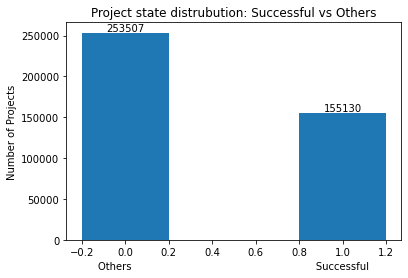

In [26]:
# draw a bar chart for y-variable
xs = ycount.index.astype("object")
ys = ycount
plt.bar(xs, ys, width = 0.4)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel("Others                                                           Successful")
plt.ylabel("Number of Projects")
plt.title("Project state distrubution: Successful vs Others")
plt.show()

In [28]:
################################### oversampling ############################
#this block was comment out because we found out later oversampling is not helping
#pip install imblearn  
#from imblearn.over_sampling import SMOTE

#import numpy as np

#sm = SMOTE(random_state=42)

#X_oversampled, y_oversampled = sm.fit_resample(xs, ys)

# examine numerical variable, then apply transofrmation

In [31]:
df_new[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].describe()

,goal,usd_pledged,backers_count,comments_count,updates_count
count,408637.00,408637.00,408637.00,408637.00,408637.00
mean,50277.61,9932.58,115.33,40.32,4.91
std,1170798.94,92920.10,913.46,1115.13,9.53
min,0.01,-2.00,-2.00,0.00,0.00
25%,2000.00,44.76,2.00,0.00,0.00
50%,5200.00,746.00,14.00,0.00,1.00
75%,16000.00,4468.32,62.00,3.00,6.00
max,100000000.00,20338986.27,219382.00,393425.00,412.00


In [32]:
test_df=df_new
test_df.head(2)

,id,state,country,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,p_category,project_duration
0,22807353,0,US,10000.00,31131.00,255,53,22,False,False,False,0.80,False,inactive,design,107
1,22810934,1,US,15000.00,18167.88,284,4,40,True,False,False,0.80,False,active,publishing,33


In [33]:
#remove rows that contain negtive value, since negtive valur doesn't make sense here
#syntax:df = df.drop(df[<some boolean condition>].index)
df_clear = test_df.drop(test_df[(test_df['backers_count']<0) | (test_df['usd_pledged']<0) ].index)

In [34]:
df_clear[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].describe()

,goal,usd_pledged,backers_count,comments_count,updates_count
count,408636.00,408636.00,408636.00,408636.00,408636.00
mean,50277.37,9932.61,115.33,40.32,4.91
std,1170800.36,92920.22,913.46,1115.13,9.53
min,0.01,0.00,0.00,0.00,0.00
25%,2000.00,44.76,2.00,0.00,0.00
50%,5200.00,746.00,14.00,0.00,1.00
75%,16000.00,4468.34,62.00,3.00,6.00
max,100000000.00,20338986.27,219382.00,393425.00,412.00


In [35]:
#statistical analysis for actual amount people have pleadged
#df_new['usd_pledged'].describe()

Text(0.5, 1.0, 'comments_count')

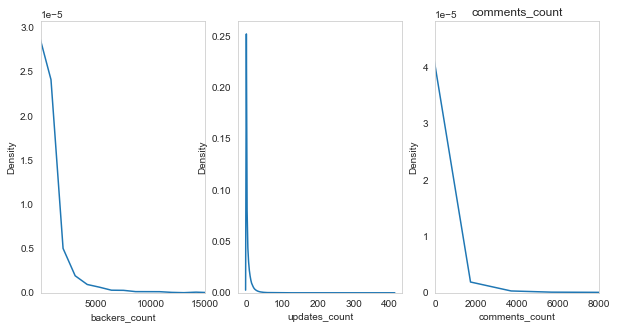

In [36]:
#density plot,for visulizing skewness, to decide whether a transformation(log or others) is needed?
sns.set_style("whitegrid", {'axes.grid' : False})#remove gridline
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,5))
sns.kdeplot(df_new['backers_count'], ax=ax1)
ax1.set_xlim(1, 15000)
#plt.xlim(xmin=0, xmax = 15000)
plt.title('backers count')
#extremely right skewed

sns.kdeplot(df_new['updates_count'], ax=ax2)
plt.xlim(xmin=0, xmax = 150)
plt.title('updates count')
#extremely right skewed

sns.kdeplot(df_new['comments_count'], ax=ax3)
plt.xlim(xmin=0, xmax = 8000)
plt.title('comments_count')
#extremely right skewed

<AxesSubplot:xlabel='goal', ylabel='Density'>

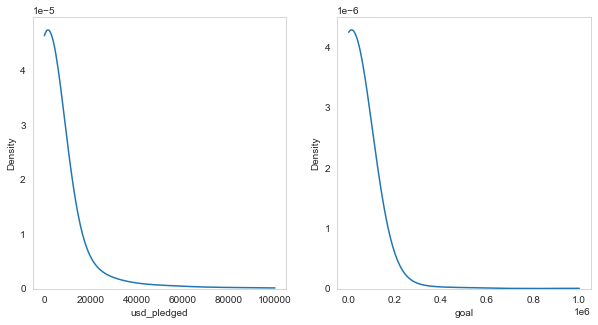

In [37]:
#plot for skewness
fig, (ax4,ax5) = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(df_new['usd_pledged'], clip=(0, 100000),ax=ax4)
sns.kdeplot(df_new['goal'], clip=(0, 1000000),ax=ax5)

In [38]:
#measure skewness before log transformation
#For normally distributed data, the skewness should be about zero. 
#For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution.
#the larger the number, the more skewness
df_new[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].skew()

goal              70.48
usd_pledged       74.55
backers_count     80.31
comments_count   161.22
updates_count      5.39
dtype: float64

In [39]:
# print(df_new['backers_count'].skew())

In [40]:
#data are extremely right-skewed, so plan to apply log transformation to skewed data
#notice there are many 0s,which will cause error for when using log transformation since log0 is infinity
#using log(x+0.01) to avoid error
df_clear['usd_pledged'] = df_clear['usd_pledged'].map(lambda x: x+0.01)
df_clear['backers_count'] = df_clear['backers_count'].map(lambda x: x+0.01)
df_clear['comments_count'] = df_clear['comments_count'].map(lambda x: x+0.01)
df_clear['updates_count'] = df_clear['updates_count'].map(lambda x: x+0.01)
df_clear[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].describe()

,goal,usd_pledged,backers_count,comments_count,updates_count
count,408636.00,408636.00,408636.00,408636.00,408636.00
mean,50277.37,9932.62,115.34,40.33,4.92
std,1170800.36,92920.22,913.46,1115.13,9.53
min,0.01,0.01,0.01,0.01,0.01
25%,2000.00,44.77,2.01,0.01,0.01
50%,5200.00,746.01,14.01,0.01,1.01
75%,16000.00,4468.35,62.01,3.01,6.01
max,100000000.00,20338986.28,219382.01,393425.01,412.01


In [41]:
#apply log transformation
df_clear["goal"] = df_clear["goal"].apply(np.log)
df_clear["usd_pledged"] = df_clear["usd_pledged"].apply(np.log)
df_clear["backers_count"] = df_clear["backers_count"].apply(np.log)
df_clear["comments_count"] = df_clear["comments_count"].apply(np.log)
df_clear["updates_count"] = df_clear["updates_count"].apply(np.log)
df_clear[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].describe()

,goal,usd_pledged,backers_count,comments_count,updates_count
count,408636.00,408636.00,408636.00,408636.00,408636.00
mean,8.65,5.33,2.06,-1.85,-1.02
std,1.73,4.46,3.03,3.39,3.14
min,-4.61,-4.61,-4.61,-4.61,-4.61
25%,7.60,3.80,0.70,-4.61,-4.61
50%,8.56,6.61,2.64,-4.61,0.01
75%,9.68,8.40,4.13,1.10,1.79
max,18.42,16.83,12.30,12.88,6.02


In [42]:
#measure skewness after log transformation
df_clear[['goal', 'usd_pledged', 'backers_count', 'comments_count', 'updates_count']].skew()
#improved a lot compared to previous data

goal             -0.11
usd_pledged      -1.12
backers_count    -0.91
comments_count    0.69
updates_count    -0.13
dtype: float64

In [48]:
#df_eda1= df_new[['id','state','goal','country','usd_pledged','backers_count','comments_count','updates_count','project_duration','profile_state','p_category']]
#df_eda1.head(2)

,id,state,goal,country,usd_pledged,backers_count,comments_count,updates_count,project_duration,profile_state,p_category
0,22807353,0,10000.00,US,31131.00,255,53,22,107,inactive,design
1,22810934,1,15000.00,US,18167.88,284,4,40,33,active,publishing


In [1]:
#write out csv for sql analysis
#df_eda1.to_csv('Simplified_data.csv',
              # sep=',',na_rep="NA",header=True,index=False)

# have some model- free insights

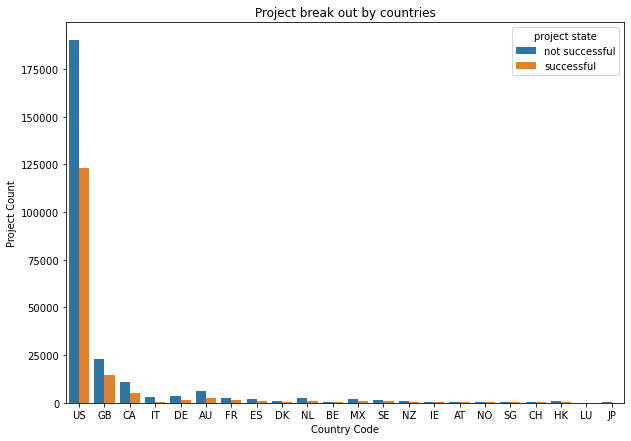

In [29]:
f = plt.figure(figsize=(10,7))
ax = f.add_subplot(1,1,1)

sns.countplot(data=df_new, x=df_new['country'], hue=df_new['state'])
ax.set_title("Project break out by countries")
ax.set_xlabel("Country Code")
ax.set_ylabel("Project Count")
ax.legend(labels = ['not successful', 'successful'], title = 'project state', loc = 'upper right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'design'),
  Text(1, 0, 'publishing'),
  Text(2, 0, 'technology'),
  Text(3, 0, 'comics'),
  Text(4, 0, 'music'),
  Text(5, 0, 'games'),
  Text(6, 0, 'art'),
  Text(7, 0, 'film & video'),
  Text(8, 0, 'photography'),
  Text(9, 0, 'crafts'),
  Text(10, 0, 'fashion'),
  Text(11, 0, 'food'),
  Text(12, 0, 'theater'),
  Text(13, 0, 'dance'),
  Text(14, 0, 'journalism')])

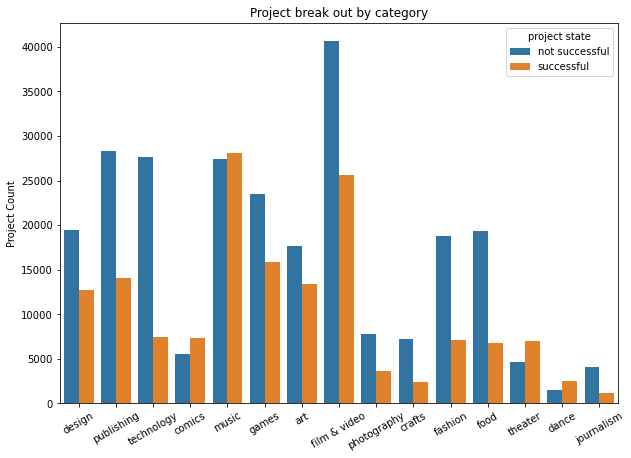

In [30]:
f = plt.figure(figsize=(10,7))
ax = f.add_subplot(1,1,1)

sns.countplot(data=df, x=df_new['p_category'], hue=df_new['state'])
ax.set_title("Project break out by category")
#ax.set_xlabel("Project category")
ax.set(xlabel=None)
ax.set_ylabel("Project Count")
ax.legend(labels = ['not successful', 'successful'], title = 'project state', loc = 'upper right')
plt.xticks(rotation=30)

# build heatmap to test if correlation existed among x variables

In [50]:
#generate a cleaned dataset for building heatmap
df_eda= df_clear[['id','state','goal','country','usd_pledged','backers_count','comments_count','updates_count','project_duration','profile_state','p_category']]
df_eda.head(2)

,id,state,goal,country,usd_pledged,backers_count,comments_count,updates_count,project_duration,profile_state,p_category
0,22807353,0,9.21,US,10.35,5.54,3.97,3.09,107,inactive,design
1,22810934,1,9.62,US,9.81,5.65,1.39,3.69,33,active,publishing


In [51]:
# import label_encoder 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'p_category'.
df_eda['p_category']= label_encoder.fit_transform(df_eda['p_category'])  
df_eda['p_category'].unique()

C:\Users\88609\AppData\Local\Temp/ipykernel_34484/3746124843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['p_category']= label_encoder.fit_transform(df_eda['p_category'])


array([ 4, 12, 13,  1, 10,  8,  0,  6, 11,  2,  5,  7, 14,  3,  9])

In [54]:
#label encoding country for heatmap
df_eda['country']= label_encoder.fit_transform(df_eda['country'])  
df_eda['country'].unique()

C:\Users\88609\AppData\Local\Temp/ipykernel_34484/1946410110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['country']= label_encoder.fit_transform(df_eda['country'])


array([21,  9,  3, 12,  5,  1,  8,  7,  6, 16,  2, 15, 19, 18, 11,  0, 17,
       20,  4, 10, 14, 13])

In [55]:
#label encoding profile_state for heatmap
df_eda['profile_state'] = df_eda['profile_state'].replace(['active', 'inactive'], 
                                  [1, 0])

C:\Users\88609\AppData\Local\Temp/ipykernel_34484/139614556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['profile_state'] = df_eda['profile_state'].replace(['active', 'inactive'],


In [56]:
#sanity check
#list(set(df_eda['profile_state']))

In [57]:
X_eda=df_eda[['state','country','usd_pledged','backers_count','comments_count','updates_count','project_duration','profile_state','p_category']]

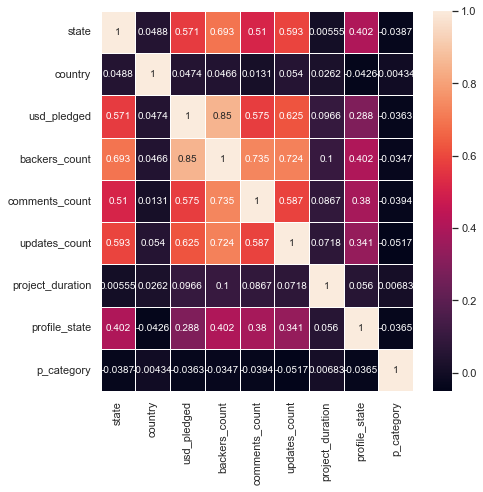

In [58]:
#heatmap to find correlations among variables
corr_matrix = X_eda.corr()
top_correlated_features = corr_matrix.index
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
plot = sns.heatmap(corr_matrix, annot = True, linewidths = .5, annot_kws={"size": 10},fmt='.3g')
# Insights:No highly correlated values

# create dummy variable

In [236]:
#transfer categorical variable into dummy variable
df_new=pd.get_dummies(df_new
               ,columns = [
                           'country',
                           'spotlight',
                           'staff_pick',
                           'disable_communication',
                           'profile_show_feature_image',
                           'profile_state',
                           'p_category'
                           ]
               ,drop_first = True
               )

In [237]:
df_new.head()

,id,state,goal,usd_pledged,backers_count,comments_count,updates_count,project_duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,spotlight_True,staff_pick_True,disable_communication_True,profile_show_feature_image_True,profile_state_inactive,p_category_comics,p_category_crafts,p_category_dance,p_category_design,p_category_fashion,p_category_film & video,p_category_food,p_category_games,p_category_journalism,p_category_music,p_category_photography,p_category_publishing,p_category_technology,p_category_theater
0,22807353,0,10000.00,31131.00,255,53,22,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,22810934,1,15000.00,18167.88,284,4,40,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,22821161,0,50000.00,9707.00,41,0,4,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,22823613,0,750.00,1.00,1,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22826244,1,7000.00,8955.41,286,20,16,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
#transfer to one hot
#encoder=ce.OneHotEncoder(cols='p_category',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#p_category_encode = encoder.fit_transform(df_new['p_category'])
#p_category_encode.head(2)

In [61]:
#p_category_encode.shape

In [62]:
#df_new = df_new.drop(['p_category'], axis=1)
#df_new.join(p_category_encode)

In [238]:
df_new.head(2)

,id,state,goal,usd_pledged,backers_count,comments_count,updates_count,project_duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,spotlight_True,staff_pick_True,disable_communication_True,profile_show_feature_image_True,profile_state_inactive,p_category_comics,p_category_crafts,p_category_dance,p_category_design,p_category_fashion,p_category_film & video,p_category_food,p_category_games,p_category_journalism,p_category_music,p_category_photography,p_category_publishing,p_category_technology,p_category_theater
0,22807353,0,10000.00,31131.00,255,53,22,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,22810934,1,15000.00,18167.88,284,4,40,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [239]:
df_new.to_csv(r'C:\Users\88609\OneDrive - Emory University\Desktop\Courses\Fall Semester\ISOM-671 Managing Big Data\HW\(1128)Final Project\Bigdata_project_final_data_final.csv', index=False)

# Training ML model <- not using this one

In [240]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score                                    
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder  
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report, auc,roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV

In [241]:
X = df_new.loc[:, df_new.columns!='state']
y = df_new['state']

In [242]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class 

[1.84922695e-04 1.12378655e-03 3.20038160e-03 3.13245705e-03
 1.43157900e-03 1.33545975e-02 2.60168067e-04 6.79128848e-05
 6.41800697e-06 7.33200051e-05 1.03544692e-05 9.21790862e-05
 1.08003279e-05 5.79990840e-05 1.33339970e-05 1.77285129e-04
 3.62203527e-05 7.33290316e-06 3.11254440e-04 1.09417644e-05
 1.21297464e-06 4.56487940e-05 6.44891493e-05 7.04290499e-06
 7.72398870e-06 1.63044502e-05 3.71410188e-06 5.92399761e-04
 8.66109541e-01 2.56423141e-02 4.39783797e-04 1.08605001e-02
 5.76892276e-02 1.17207694e-03 2.27949568e-04 6.70436491e-04
 1.10031297e-04 5.75746247e-04 3.00296316e-04 6.94208828e-04
 3.97776963e-04 1.90784832e-04 4.19920544e-03 3.43238308e-05
 2.22341562e-04 3.50857100e-03 2.65310306e-03]


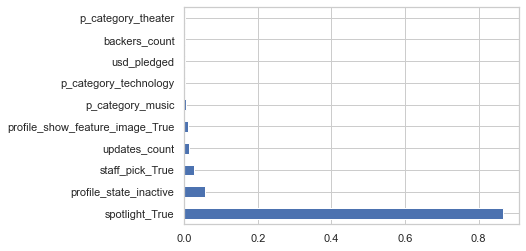

In [243]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#find the top 10 attributes
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

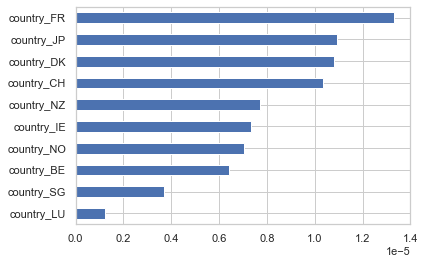

In [256]:
#find the least relevant attributes
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [244]:
# split train and test
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [245]:
# split dataset into train&test sets
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,              
                                                    y, 
                                                    test_size=0.40, 
                                                    random_state=42,
                                                    shuffle=True)

In [246]:
X_train.head()

,id,goal,usd_pledged,backers_count,comments_count,updates_count,project_duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,spotlight_True,staff_pick_True,disable_communication_True,profile_show_feature_image_True,profile_state_inactive,p_category_comics,p_category_crafts,p_category_dance,p_category_design,p_category_fashion,p_category_film & video,p_category_food,p_category_games,p_category_journalism,p_category_music,p_category_photography,p_category_publishing,p_category_technology,p_category_theater
188712,1351935264,999.00,10.00,1,0,0,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
30882,240758699,5500.00,1105.00,4,0,0,307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
191251,1369805897,600.00,605.00,12,1,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
258748,1841912031,86000.00,1173.00,17,6,1,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
368104,1544361117,550000.00,1578950.11,19829,10587,85,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [248]:
X_train.shape

(245182, 47)

In [251]:
X_test.shape

(163455, 47)

In [252]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42) # outer cross-validation folds

# Train ML model

In [253]:
def find_optimum_parameters(model,parameters):

  """
  This function is used to find the optimal parameters using grid search. It takes model parameter and parameters as a 
  dictionary.
  """

  inner_cv = KFold(n_splits=4, shuffle=True) # inner cross-validation folds
  outer_cv = KFold(n_splits=4, shuffle=True) # outer cross-validation folds

  ############################## Random Forest Parameter Tuning ##############################

  gs_dt2 = GridSearchCV(estimator=model,
                    param_grid=[parameters],
                    scoring='roc_auc',
                    cv=inner_cv,
                    n_jobs=4)

  gs_dt2 = gs_dt2.fit(X,y)
  print("\n Parameter Tuning #1 - Random Forest")
  print("Non-nested CV AUC: ", gs_dt2.best_score_)
  print("Optimal Parameter: ", gs_dt2.best_params_)
  print("Optimal Estimator: ", gs_dt2.best_estimator_)
  nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
  print("Nested CV AUC: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())

In [254]:
def create_submission(predictions):
  """
  This function creates the submission file
  """
  y_pred_final=pd.Series(predictions)
  submission = pd.DataFrame(columns = ['policy_id', 'TARGET'])
  submission['policy_id'] = original_df.loc[original_df.convert_ind.isnull(),'policy_id'].reset_index(drop=True)
  submission['TARGET'] = y_pred_final
  return submission

Logistic Regression Model

In [255]:
# Logistic Regression #

from sklearn import linear_model 
model=LogisticRegression(random_state=42,solver='liblinear')
parameters ={'C': [0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19 ],
                              'penalty':['l1','l2']}

find_optimum_parameters(model,parameters)   


 Parameter Tuning #1 - Random Forest
Non-nested CV AUC:  0.9999935564464801
Optimal Parameter:  {'C': 0.15, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.15, penalty='l1', random_state=42, solver='liblinear')
Nested CV AUC:  0.9999935419289483  +/-  1.118570718054251e-05


In [257]:
clf = linear_model.LogisticRegression(multi_class='auto', # accomondates multi-class categorical target variable
                                      C=0.14, # C parameter is the inverse of regularization strength (i.e., smaller C values 
                                      penalty='l1',
                                      random_state=42,
                                      solver='liblinear'
                                      )       # maximum number of iterations taken for the solvers to converge. Default is 100
 

clf = clf.fit(X_train, y_train)                             # model induction using the train data
# print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
# print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function

#################################### Apply the Logistic Regression Model ####################################

# We now apply the logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
# print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays
auc_score1 = roc_auc_score(y_test, y_pred_prob[:, 1])
auc_score1
# print(classification_report(y_test, y_pred))
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# print('The AUC is:',roc_auc_score(y, clf.predict_proba(X_test)[:, 1]))

0.9999999984108847

Random Forest Model

In [258]:
from sklearn.metrics import roc_auc_score 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1100,
                             max_depth=10) 

clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
# print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays
auc_score1 = roc_auc_score(y_test, y_pred_prob[:, 1])
auc_score1

1.0